# Central limit theorem 중심극한정리

중심극한정리가 무엇인지에 대해서 개념을 살펴보고 데이터를 통해서 이해를 하는 것을 목표로 한다.

모든 기본 내용은 일반통계학 (김우철, 김재주 공저. 2006년판. pp.158~162) 를 참조 하였다.

jupyter presentation 용입니다. 
```bash
jupyter nbconvert <ipynb> --to slides --post serve
```
명령어를 실행해 주십시오.

## 표본평균의 표본분포에 관한 성질
모집단의 분포가 정규분포 $N(\mu,\sigma^2)$ 일 때 표본평균 $\bar{X}$ 는 정규분포 $N(\mu,\frac{\sigma^2}{n})$ 을 따른다.

한편 모집단의 분포가 정규분포가 아닌 경우에는 위의 사실이 성립하지 않는다고 한다. 하지만! 표본의 크기 n 이 충분히 클 때에는 임이의 모집단으로 부터의 표본평균이라 하더라도 그 분포가 정규분포에 가깝다는 것이 알려져 있는데 이것이 중심극한정리이다.

즉, 
평균이 $\mu$ 이고 분산이 $\sigma^2$ 인 임의의 `무한모집단` 에서 표본 크기 n 이 충분히 크면, 랜덤표본의 표본평균 $\bar{X}$ 는 근사적으로 정규분포  $N(\mu,\frac{\sigma^2}{n})$ 를 따른다. 즉
\begin{equation*}
\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} \approx N(0,1)
\end{equation*}

`유한모집단`인 경우에도 유사하다.
\begin{equation*}
\frac{\bar{X}-\mu}{\sigma\sqrt{\frac{N-n}{n(N-1)}}} \approx N(0,1)
\end{equation*}


자 이게 무슨 소리인지 살펴보자. 

우선 무한 모집단에 가까운 굉장히 큰 임의의 모집단을 만들어 본다.




In [38]:
import numpy as np
import matplotlib.pyplot as plt
nnsize=10000
x1=np.random.normal(loc=0.0, scale=1.0,size=nnsize)
x2=np.random.normal(loc=10.0, scale=2.0,size=nnsize)
x3=np.random.normal(loc=30.0, scale=1.5,size=nnsize)

어떻게 생긴 모집단인지 살펴본다. 총 30000개의 데이터가 모여있는 세개의 그룹으로 이루어진 데이터이다.

mean is 13.339321015091114


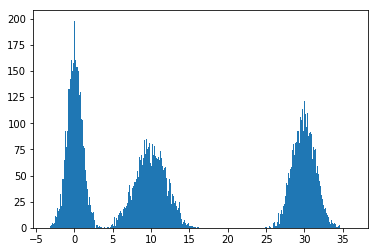

In [39]:
X=np.append(x1,[x2,x3])
n,bins,patch=plt.hist(X,bins=1000)
print("mean is {}".format(np.mean(X)))
mu=np.mean(X)

random sampling 을 해 본다.
일단 그림으로 이해하기 쉽게 하기 위해서 4개만 1000개의 샘플씩을 샘플링한다.

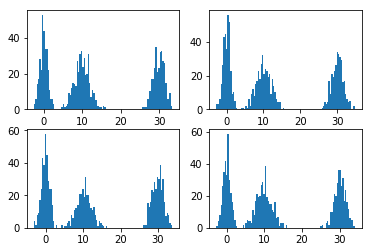

In [40]:
fig = plt.figure()
pcont=[]
container=[]
samplesize=1000
for ii in [1,2,3,4]:
    pcont.append(fig.add_subplot(2,2,ii))
for ii in [1,2,3,4]:
    xp1=np.random.choice(X, size=samplesize)
    n,bins,patch=pcont[ii-1].hist(xp1,bins=100)
    container.append([np.mean(xp1),np.std(xp1)])

그럼 각 sampling 한 표본집단들의 평균들을 구해본다. 각 표본집단의 평균은 $\bar{X}$ 로 표시한다.

In [43]:
for ii in range(1000):
    xp1=np.random.choice(X, size=samplesize)
    container.append([np.mean(xp1),np.std(xp1)])
barX=np.array(container)
barX[:,0]

array([13.41072926, 13.07446328, 13.49817733, ..., 13.51428031,
       12.8818774 , 13.43741065])

바로 위에서 1000개씩 표본집단을 1000개 만들었다. 이때 각 표본집단의 표본평균 $\bar{X}$ 1000개의 분포는 과연 어떻게 생겼을까?

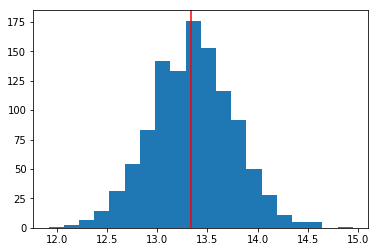

In [48]:
n,bins,patch=plt.hist(barX[:,0],bins=20)
plt.axvline(x=mu,color='r')

위 그림처럼 모평균(붉은색 선) 을 중심으로 하여서 정규분포 비슷한 모양으로 $\bar{X}$ 들이 분포하고 있음이 관찰 된다.